# Importing necessary libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                  
warnings.filterwarnings("ignore")  # To ignore the warnings 
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\Ankan\Documents\DA GC 2020\train.csv")
test = pd.read_csv(r"C:\Users\Ankan\Documents\DA GC 2020\test (1).csv")
test

,timestamp,building_number
0,2018-01-01 00:00:00,1
1,2018-01-01 00:15:00,1
2,2018-01-01 00:30:00,1
3,2018-01-01 00:45:00,1
4,2018-01-01 01:00:00,1
...,...,...
51612,2018-04-18 12:00:00,5
51613,2018-04-18 12:15:00,5
51614,2018-04-18 12:30:00,5
51615,2018-04-18 12:45:00,5


# Checking the dataset

In [3]:
train_original=train.copy() 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132000 entries, 0 to 131999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        132000 non-null  object 
 1   building_number  132000 non-null  int64  
 2   main_meter       132000 non-null  float64
 3   sub_meter_1      132000 non-null  float64
 4   sub_meter_2      132000 non-null  float64
 5   dt               5280 non-null    float64
 6   wt               5280 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 7.0+ MB


In [5]:
train['timestamp'] = pd.to_datetime(train['timestamp'],infer_datetime_format=True)  
test['timestamp'] = pd.to_datetime(test['timestamp'],infer_datetime_format=True)  

# Building Wise dataset

In [6]:
ts1 = train[train['building_number']==1]
ts2 = train[train['building_number']==2]
ts3 = train[train['building_number']==3]
ts4 = train[train['building_number']==4]
ts5 = train[train['building_number']==5]
ts6 = test[test['building_number']==1]
ts7 = test[test['building_number']==2]
ts8 = test[test['building_number']==3]
ts9 = test[test['building_number']==4]
ts10 = test[test['building_number']==5]


# Setting Timestamp as index

In [7]:
ts1.index = ts1['timestamp']
ts2.index = ts2['timestamp']
ts3.index = ts3['timestamp']
ts4.index = ts4['timestamp']
ts5.index = ts5['timestamp']
ts6.index = ts6['timestamp']
ts7.index = ts7['timestamp']
ts8.index = ts8['timestamp']
ts9.index = ts9['timestamp']
ts10.index = ts10['timestamp']


# Data is aggregated (1hr) Buildingwise

In [8]:
build1 = ts1.resample('1H').mean()
build2 = ts2.resample('1H').mean()
build3 = ts3.resample('1H').mean()
build4 = ts4.resample('1H').mean()
build5 = ts5.resample('1H').mean()
build_1_test = ts6.resample('1H').mean()
build_2_test = ts7.resample('1H').mean()
build_3_test = ts8.resample('1H').mean()
build_4_test = ts9.resample('1H').mean()
build_5_test = ts10.resample('1H').mean()


# Reseting the Index Back To normal

In [9]:
build1 = build1.reset_index()
build2 = build2.reset_index()
build3 = build3.reset_index()
build4 = build4.reset_index()
build5 = build5.reset_index()
build_1_test = build_1_test.reset_index()
build_2_test = build_2_test.reset_index()
build_3_test = build_3_test.reset_index()
build_4_test = build_4_test.reset_index()
build_5_test = build_5_test.reset_index()

In [10]:
build1

,timestamp,building_number,main_meter,sub_meter_1,sub_meter_2,dt,wt
0,2017-01-04 00:00:00,1.0,2452.453706,947.170207,0.450666,7.0,0.952638
1,2017-01-04 01:00:00,1.0,2722.733293,1142.593908,1.377337,7.0,0.952638
2,2017-01-04 02:00:00,1.0,2875.868294,1325.265792,3.915958,7.0,0.952638
3,2017-01-04 03:00:00,1.0,2803.582630,1279.729428,0.084493,7.0,0.952638
4,2017-01-04 04:00:00,1.0,2465.531768,922.310425,0.155445,7.0,0.952638
...,...,...,...,...,...,...,...
8683,2017-12-31 19:00:00,1.0,2021.301928,957.024631,0.582683,NaN,NaN
8684,2017-12-31 20:00:00,1.0,1848.036869,719.780383,0.000000,NaN,NaN
8685,2017-12-31 21:00:00,1.0,1964.453573,742.286785,1.532929,NaN,NaN
8686,2017-12-31 22:00:00,1.0,1967.172924,841.157701,2.498131,NaN,NaN


# Concatenating The Data of 5 Buildings 

In [11]:
frames = [build1,build2,build3,build4,build5]
result = pd.concat(frames)

frames_test = [build_1_test,build_2_test,build_3_test,build_4_test,build_5_test]
result_test = pd.concat(frames_test)
result_test = result_test.reset_index()

# Adding Year,month,day,hour

In [12]:
for i in (result,result_test):
    i['year']=i.timestamp.dt.year 
    i['month']=i.timestamp.dt.month 
    i['day']=i.timestamp.dt.day
    i['Hour']=i.timestamp.dt.hour 
    

In [13]:
result['day of week']=result['timestamp'].dt.dayofweek 
result_test['day of week']=result_test['timestamp'].dt.dayofweek 
result_test

,index,timestamp,building_number,year,month,day,Hour,day of week
0,0,2018-01-01 00:00:00,1,2018,1,1,0,0
1,1,2018-01-01 01:00:00,1,2018,1,1,1,0
2,2,2018-01-01 02:00:00,1,2018,1,1,2,0
3,3,2018-01-01 03:00:00,1,2018,1,1,3,0
4,4,2018-01-01 04:00:00,1,2018,1,1,4,0
...,...,...,...,...,...,...,...,...
12903,2577,2018-04-18 09:00:00,5,2018,4,18,9,2
12904,2578,2018-04-18 10:00:00,5,2018,4,18,10,2
12905,2579,2018-04-18 11:00:00,5,2018,4,18,11,2
12906,2580,2018-04-18 12:00:00,5,2018,4,18,12,2


# New Feature - Is Weekend or not??


In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = result['timestamp'].apply(applyer)   #apply functon is used 
result['weekend']=temp2
temp3 = result_test['timestamp'].apply(applyer)   #apply functon is used 
result_test['weekend']=temp3

In [15]:
result_test

,index,timestamp,building_number,year,month,day,Hour,day of week,weekend
0,0,2018-01-01 00:00:00,1,2018,1,1,0,0,0
1,1,2018-01-01 01:00:00,1,2018,1,1,1,0,0
2,2,2018-01-01 02:00:00,1,2018,1,1,2,0,0
3,3,2018-01-01 03:00:00,1,2018,1,1,3,0,0
4,4,2018-01-01 04:00:00,1,2018,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...
12903,2577,2018-04-18 09:00:00,5,2018,4,18,9,2,0
12904,2578,2018-04-18 10:00:00,5,2018,4,18,10,2,0
12905,2579,2018-04-18 11:00:00,5,2018,4,18,11,2,0
12906,2580,2018-04-18 12:00:00,5,2018,4,18,12,2,0


# New Feature - Is Corporate or Not?

In [16]:
temp4 = result['Hour'].apply(lambda x: 0 if 0<= x <= 7 or 20<=x<=23 else 1)   #apply functon is used 
result['corporate']=temp4
temp5 = result_test['Hour'].apply(lambda x: 0 if 0<= x <= 7 or 20<=x<=23 else 1)   #apply functon is used 
result_test['corporate']=temp5

In [17]:
copy = result_test

In [18]:
result

,timestamp,building_number,main_meter,sub_meter_1,sub_meter_2,dt,wt,year,month,day,Hour,day of week,weekend,corporate
0,2017-01-04 00:00:00,1.0,2452.453706,947.170207,0.450666,7.0,0.952638,2017,1,4,0,2,0,0
1,2017-01-04 01:00:00,1.0,2722.733293,1142.593908,1.377337,7.0,0.952638,2017,1,4,1,2,0,0
2,2017-01-04 02:00:00,1.0,2875.868294,1325.265792,3.915958,7.0,0.952638,2017,1,4,2,2,0,0
3,2017-01-04 03:00:00,1.0,2803.582630,1279.729428,0.084493,7.0,0.952638,2017,1,4,3,2,0,0
4,2017-01-04 04:00:00,1.0,2465.531768,922.310425,0.155445,7.0,0.952638,2017,1,4,4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,2017-12-31 19:00:00,5.0,2563.415616,1249.272994,0.000000,NaN,NaN,2017,12,31,19,6,1,1
8684,2017-12-31 20:00:00,5.0,2446.584835,1204.131748,1.975446,NaN,NaN,2017,12,31,20,6,1,0
8685,2017-12-31 21:00:00,5.0,2214.268005,1082.285606,1.148236,NaN,NaN,2017,12,31,21,6,1,0
8686,2017-12-31 22:00:00,5.0,2318.596948,1175.095958,2.231142,NaN,NaN,2017,12,31,22,6,1,0


# Summary statistics of the data
Getting the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

In [19]:
result.describe()

,building_number,main_meter,sub_meter_1,sub_meter_2,dt,wt,year,month,day,Hour,day of week,weekend,corporate
count,33000.000000,33000.000000,33000.000000,33000.000000,1320.000000,1320.000000,43440.0,43440.000000,43440.000000,43440.000000,43440.000000,43440.000000,43440.000000
mean,3.000000,6095.767107,2092.888851,776.830989,17.091288,0.889725,2017.0,6.571823,15.834254,11.500000,3.013812,0.287293,0.500000
std,1.414235,3438.791729,1112.116862,873.164115,8.220803,0.050841,0.0,3.425098,8.742904,6.922266,1.996519,0.452505,0.500006
min,1.000000,422.507566,0.000000,0.000000,1.000000,0.806642,2017.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3477.157435,1384.265411,5.263125,10.000000,0.846745,2017.0,4.000000,8.000000,5.750000,1.000000,0.000000,0.000000
50%,3.000000,5384.620275,2076.003734,623.060637,17.000000,0.888843,2017.0,7.000000,16.000000,11.500000,3.000000,0.000000,0.500000
75%,4.000000,7663.856060,2748.613271,1333.573310,24.000000,0.933033,2017.0,10.000000,23.000000,17.250000,5.000000,1.000000,1.000000
max,5.000000,22921.319215,7030.578000,4290.668675,31.000000,0.993092,2017.0,12.000000,31.000000,23.000000,6.000000,1.000000,1.000000


# Visualising the main meter readings using histogram

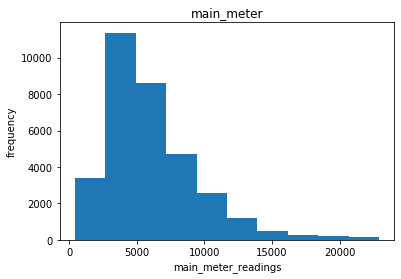

In [20]:
plt.hist(result['main_meter']);
plt.title('main_meter')
plt.xlabel('main_meter_readings');
plt.ylabel('frequency');

# Density plot with histogram

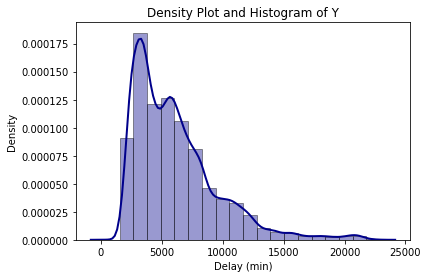

In [21]:
def density_plot(y, bin_width):
    sns.distplot(y, hist=True, kde=True, 
                 bins=int(180/bin_width), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2});

    plt.title('Density Plot and Histogram of Y'); 
    plt.xlabel('Delay (min)'); plt.ylabel('Density');
density_plot(result['main_meter'],bin_width = 9)

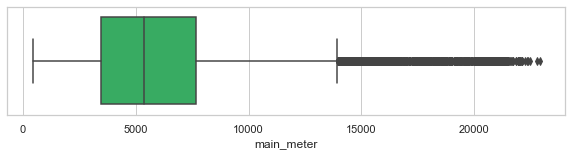

In [22]:
plt.figure(figsize=(10,2))
sns.set(style="whitegrid")
x = result['main_meter']
sns.boxplot(x,color = '#25BE5D')
plt.savefig('main_meter.PNG')


Using boxplot, we found that there exists anomalous data above the value of 15000 for main_meter , so we replace these values by the mean value acoss the main_meter column
(Percentage of anomalous data earlier existing = 2.65)

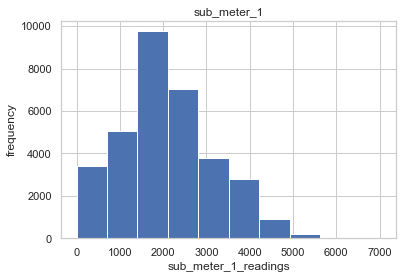

In [23]:
plt.hist(result['sub_meter_1']);
plt.title('sub_meter_1')
plt.xlabel('sub_meter_1_readings');
plt.ylabel('frequency');

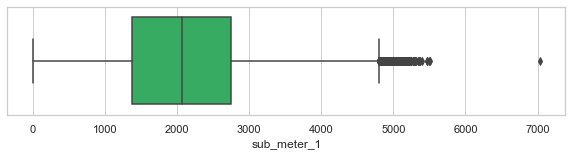

In [24]:
plt.figure(figsize=(10,2))
y=result['sub_meter_1']
sns.boxplot(y,color = '#25BE5D')
plt.savefig('sub_meter_1.PNG')


Similar steps are followed to take care of sub_meter_1 readings
Anomalous values of sub_meter_1 were replaced these by the mean of the column of sub_meter_1
(Perecentage of anomalous data earlier existing = 0.45)

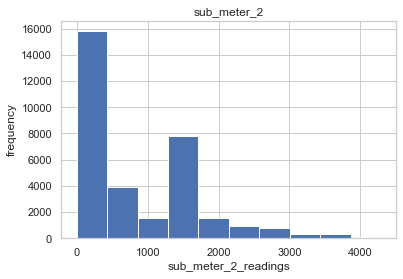

In [25]:
plt.hist(result['sub_meter_2']);
plt.title('sub_meter_2')
plt.xlabel('sub_meter_2_readings');
plt.ylabel('frequency');

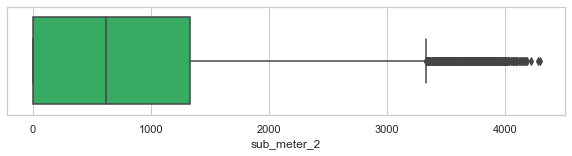

In [26]:
plt.figure(figsize=(10,2))
z=result['sub_meter_2']
sns.boxplot(z,color = '#25BE5D')
plt.savefig('sub_meter_2.PNG')


Similar techniques were employed to treat anomalous values of sub_meter_2.
(Percentage anomaly existing earlier  = 2.13)

# Storing the mean of the meters to replace the anomalies

In [27]:
anomaly_mean_main_meter = result['main_meter'].mean()
anomaly_mean_sub_meter_1 = result['sub_meter_1'].mean()
anomaly_mean_sub_meter_2 = result['sub_meter_2'].mean()


# Replacing the anomalies by the means of the respective meters

In [28]:
result.loc[(result.main_meter > 15000),'main_meter']=anomaly_mean_main_meter

result.loc[(result.sub_meter_1 > 5000),'sub_meter_1']=anomaly_mean_sub_meter_2

result.loc[(result.sub_meter_2 > 3000),'sub_meter_2']=anomaly_mean_sub_meter_2


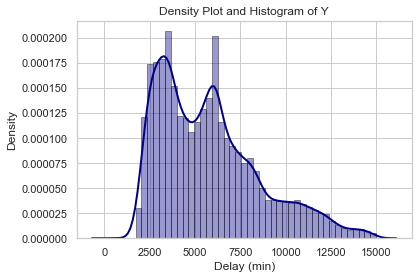

In [29]:
# Show density plot with histogram
def density_plot(y, bin_width):
    sns.distplot(y, hist=True, kde=True, 
                 bins=int(180/bin_width), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 2});

    plt.title('Density Plot and Histogram of Y'); 
    plt.xlabel('Delay (min)'); plt.ylabel('Density');
density_plot(result['main_meter'],bin_width = 4)

# Using this cleaned data to form a new dataset and reverting back to original format

In [30]:
result.to_csv('box_plot.csv')

In [31]:
#droping columns who were used to create to new features
result = result.drop(['Hour','day','month','year'],axis = 1)
#droping columns who were used to create to new features
result_test = result_test.drop(['Hour','day','month','year'],axis = 1)
copy

,index,timestamp,building_number,year,month,day,Hour,day of week,weekend,corporate
0,0,2018-01-01 00:00:00,1,2018,1,1,0,0,0,0
1,1,2018-01-01 01:00:00,1,2018,1,1,1,0,0,0
2,2,2018-01-01 02:00:00,1,2018,1,1,2,0,0,0
3,3,2018-01-01 03:00:00,1,2018,1,1,3,0,0,0
4,4,2018-01-01 04:00:00,1,2018,1,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...
12903,2577,2018-04-18 09:00:00,5,2018,4,18,9,2,0,1
12904,2578,2018-04-18 10:00:00,5,2018,4,18,10,2,0,1
12905,2579,2018-04-18 11:00:00,5,2018,4,18,11,2,0,1
12906,2580,2018-04-18 12:00:00,5,2018,4,18,12,2,0,1


In [32]:
no = copy['building_number']

# One Hot Encoding

In [33]:
one_hot = ['day of week','building_number']
final = pd.get_dummies(result,columns = one_hot)
final_test = pd.get_dummies(result_test,columns = one_hot)


In [34]:
final

,timestamp,main_meter,sub_meter_1,sub_meter_2,dt,wt,weekend,corporate,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,building_number_1.0,building_number_2.0,building_number_3.0,building_number_4.0,building_number_5.0
0,2017-01-04 00:00:00,2452.453706,947.170207,0.450666,7.0,0.952638,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,2017-01-04 01:00:00,2722.733293,1142.593908,1.377337,7.0,0.952638,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,2017-01-04 02:00:00,2875.868294,1325.265792,3.915958,7.0,0.952638,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,2017-01-04 03:00:00,2803.582630,1279.729428,0.084493,7.0,0.952638,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2017-01-04 04:00:00,2465.531768,922.310425,0.155445,7.0,0.952638,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,2017-12-31 19:00:00,2563.415616,1249.272994,0.000000,NaN,NaN,1,1,0,0,0,0,0,0,1,0,0,0,0,1
8684,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8685,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,1
8686,2017-12-31 22:00:00,2318.596948,1175.095958,2.231142,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [35]:
final_test.to_csv('test.csv')

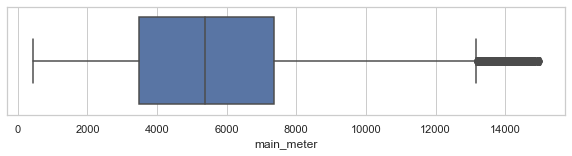

In [36]:
plt.figure(figsize=(10,2))
x=final['main_meter']
sns.boxplot(x)

In [37]:
final

In [38]:
result_test

,index,timestamp,building_number,day of week,weekend,corporate
0,0,2018-01-01 00:00:00,1,0,0,0
1,1,2018-01-01 01:00:00,1,0,0,0
2,2,2018-01-01 02:00:00,1,0,0,0
3,3,2018-01-01 03:00:00,1,0,0,0
4,4,2018-01-01 04:00:00,1,0,0,0
...,...,...,...,...,...,...
12903,2577,2018-04-18 09:00:00,5,2,0,1
12904,2578,2018-04-18 10:00:00,5,2,0,1
12905,2579,2018-04-18 11:00:00,5,2,0,1
12906,2580,2018-04-18 12:00:00,5,2,0,1


In [39]:
final_test

,index,timestamp,weekend,corporate,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,building_number_1,building_number_2,building_number_3,building_number_4,building_number_5
0,0,2018-01-01 00:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,2018-01-01 01:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2,2018-01-01 02:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,3,2018-01-01 03:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,4,2018-01-01 04:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12903,2577,2018-04-18 09:00:00,0,1,0,0,1,0,0,0,0,0,0,0,0,1
12904,2578,2018-04-18 10:00:00,0,1,0,0,1,0,0,0,0,0,0,0,0,1
12905,2579,2018-04-18 11:00:00,0,1,0,0,1,0,0,0,0,0,0,0,0,1
12906,2580,2018-04-18 12:00:00,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [40]:
d1 = final_test[final_test['building_number_1']==1]
d2 = final_test[final_test['building_number_2']==1]
d3 = final_test[final_test['building_number_3']==1]
d4 = final_test[final_test['building_number_4']==1]
d5 = final_test[final_test['building_number_5']==1]

In [41]:
d1

,index,timestamp,weekend,corporate,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6,building_number_1,building_number_2,building_number_3,building_number_4,building_number_5
0,0,2018-01-01 00:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,1,2018-01-01 01:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,2,2018-01-01 02:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,3,2018-01-01 03:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,4,2018-01-01 04:00:00,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,2577,2018-04-18 09:00:00,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2578,2578,2018-04-18 10:00:00,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2579,2579,2018-04-18 11:00:00,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2580,2580,2018-04-18 12:00:00,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [42]:
d1.to_csv('test_b1.csv')
d2.to_csv('test_b2.csv')
d3.to_csv('test_b3.csv')
d4.to_csv('test_b4.csv')
d5.to_csv('test_b5.csv')

# Using ARIMA Model to forecast future values
Showing the model for forecasting future values of building 1, main_meter 

Appropriate instructions also follow as to how to change code snippets in order to forecast for other buildings and meters

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('final_gc_anolomy.csv')

In [47]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df=df[df['building_number']==1]    #set building number == x accordingly depending on which building's meter you want to work on
df.head()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
0,2017-01-04 00:00:00,2452.453706,947.170207,0.450666,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
1,2017-01-04 01:00:00,2722.733293,1142.593908,1.377337,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
2,2017-01-04 02:00:00,2875.868294,1325.265793,3.915958,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
3,2017-01-04 03:00:00,2803.582630,1279.729428,0.084493,1,1,0,2713.659481,3778.895815,0,0,0,0,0,1,0
4,2017-01-04 04:00:00,2465.531768,922.310425,0.155445,1,1,0,3931.024433,3778.895815,0,0,0,0,0,1,0


Dropping all other columns except main_meter because ARIMA only works on univariate data.

In [48]:
df=df.drop(columns=['sub_meter_1','sub_meter_2','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df.head()
#if you want to forecast sub_meter_1 readings, the drop 'main_meter' instead of 'sub_meter_1' and so on.

,timestamp,main_meter
0,2017-01-04 00:00:00,2452.453706
1,2017-01-04 01:00:00,2722.733293
2,2017-01-04 02:00:00,2875.868294
3,2017-01-04 03:00:00,2803.582630
4,2017-01-04 04:00:00,2465.531768


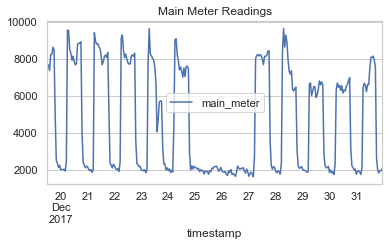

In [49]:
df=df.set_index('timestamp')
from plotly.offline import plot
import cufflinks as cf
df.tail(300).plot(title="Main Meter Readings", figsize=(6,3))   # Adjust plot title accordingly

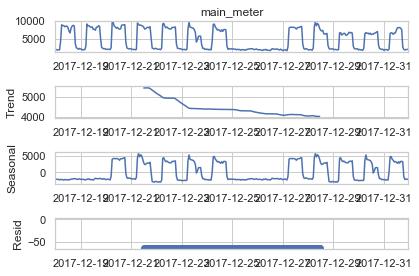

In [50]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.main_meter.tail(336), model='additive',period=168)
fig=result.plot()     # plots to check the different components of data

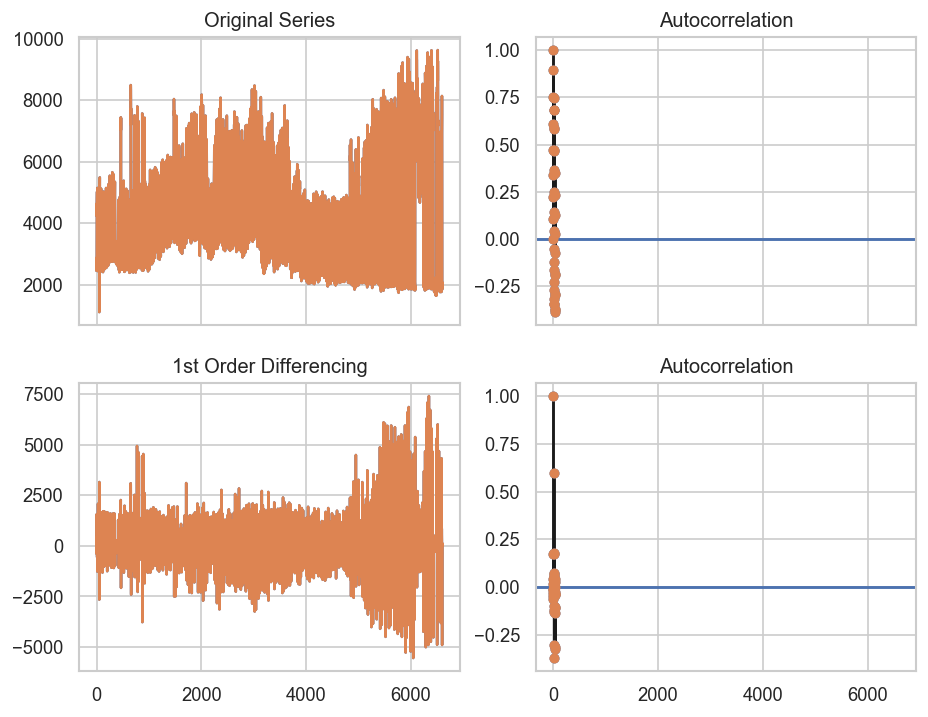

In [52]:
df=df.reset_index()
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# Original Series
#fig, axes = plt.subplots(2, 2, sharex=True)
axes[0, 0].plot(df.main_meter); axes[0, 0].set_title('Original Series')
plot_acf(df.main_meter, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.main_meter.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.main_meter.diff().dropna(), ax=axes[1, 1])


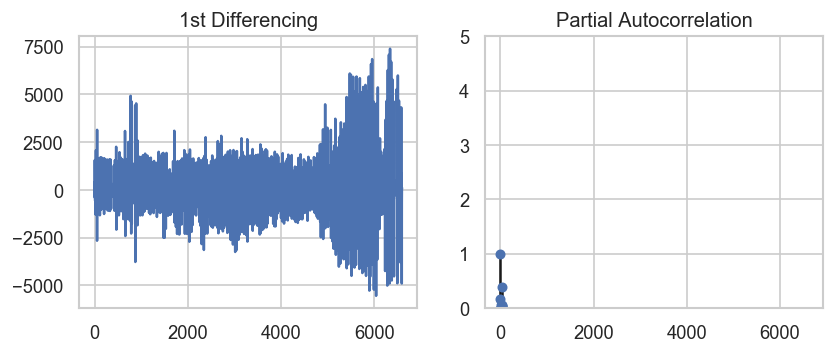

In [53]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(8,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.main_meter.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.main_meter.diff().dropna(), ax=axes[1])

plt.show()

Using Grid Search to tune optimal parameters of p and q. We ourselves set the value of d=1 to inducestationarity in the data ,as observed from the above differencing and acf,pacf plots 

In [56]:
df=df.set_index('timestamp')
df=df.drop(columns=['index'])
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,max_p=5, max_q=5,start_P=0, seasonal=False,d=1, D=1, trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1); AIC=107002.997, BIC=107030.175, Fit time=0.820 seconds
Fit ARIMA: order=(0, 1, 0); AIC=107199.624, BIC=107213.214, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0); AIC=107001.769, BIC=107022.153, Fit time=0.047 seconds
Fit ARIMA: order=(0, 1, 1); AIC=107005.632, BIC=107026.016, Fit time=0.035 seconds
Fit ARIMA: order=(2, 1, 0); AIC=107002.565, BIC=107029.743, Fit time=0.047 seconds
Fit ARIMA: order=(2, 1, 1); AIC=106420.839, BIC=106454.813, Fit time=2.099 seconds
Fit ARIMA: order=(3, 1, 1); AIC=106376.814, BIC=106417.583, Fit time=2.899 seconds
Fit ARIMA: order=(3, 1, 0); AIC=106989.368, BIC=107023.341, Fit time=0.068 seconds
Fit ARIMA: order=(3, 1, 2); AIC=106062.024, BIC=106109.587, Fit time=4.134 seconds
Fit ARIMA: order=(4, 1, 3); AIC=105769.919, BIC=105831.071, Fit time=5.253 seconds
Fit ARIMA: order=(3, 1, 3); AIC=105825.732, BIC=105880.089, Fit time=6.281 seconds
Fit ARIMA: order=(5, 1, 3); AIC=105556.405, BIC=105624.352, Fit time=7.669 seconds
Fit 

In [57]:
train = df.loc[:]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 1, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

# We are required to forecast the values starting from January 1 00:00:00 till April 18 13:00:00
Divided as 15 minute intervals, we get a total of 10325 values to be predicted
However, we are working on 1 Hr aggregated data.
Hence required number of predictions to be made = ceil(10325/4) = 2582 

In [58]:
future_forecast = stepwise_model.predict(n_periods=2582)
future_forecast

array([2123.54155596, 2088.36698306, 2487.91822942, ..., 5049.52948575,
       5051.18660587, 5049.90523654])

Now, we have with us the required array of predicted values.

We need to upsample it 4 times (since we need to finally evaluate it against the 15 minute interval timestamps.

In [59]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('Building1_Mainmeter.csv')

In [60]:
df7=pd.read_csv('C:/Users/Ankan/Downloads/Building1_Mainmeter.csv')

In [61]:
new=np.repeat(df7['0'],4)
new.to_csv('final_Building1_Mainmeter.csv')

Now we have with us the final array of predictions for the chosen building and meter.

Similar procedures were followed to obtain the forecast values in the other cases.